In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

sb.set_style('darkgrid')
import plotly.io as pio
#pio.templates.default = "plotly_dark"

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

In [2]:
dfy = pd.read_excel('bestt.xlsx',dtype={"no_of_reviews": str})
dfy


,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,category,Unnamed: 10
0,0,12.49,1.0,The Lost Symbol,16118,4.4,Dan Brown,Hardcover,2009,Fiction,NaN
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392,4.7,William P. Young,Paperback,2009,Fiction,NaN
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036,4.8,Mark R. Levin,Hardcover,2009,Non Fiction,NaN
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912,4.7,Stephenie Meyer,Hardcover,2009,Fiction,NaN
4,4,9.99,5.0,Going Rogue: An American Life,1572,4.6,Sarah Palin,Hardcover,2009,Non Fiction,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,NaN,4.8,Will Smith,Hardcover,2021,Non Fiction,NaN
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,79872,4.7,Napoleon Hill,Paperback,2021,Non Fiction,NaN
1288,1288,8.95,98.0,Dragons Love Tacos,15753,4.8,Adam Rubin,Hardcover,2021,Fiction,NaN
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,NaN,4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction,NaN


In [3]:
dfy.drop(columns=['Unnamed: 0'], inplace=True)
dfy.drop(columns=['Unnamed: 10'], inplace=True)
#dfy.dropna(inplace= True)
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1252 non-null   float64
 1   ranks          1287 non-null   float64
 2   title          1283 non-null   object 
 3   no_of_reviews  1113 non-null   object 
 4   ratings        1287 non-null   float64
 5   author         1283 non-null   object 
 6   cover_type     1285 non-null   object 
 7   year           1291 non-null   int64  
 8   category       1291 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 90.9+ KB


In [4]:
dfy['no_of_reviews'] = dfy['no_of_reviews'].str.replace(',', '').astype(float)

dfy['no_of_reviews']= pd.to_numeric(dfy['no_of_reviews'])


In [5]:
dfy

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,category
0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...
1286,16.69,96.0,Will,NaN,4.8,Will Smith,Hardcover,2021,Non Fiction
1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,79872.0,4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,8.95,98.0,Dragons Love Tacos,15753.0,4.8,Adam Rubin,Hardcover,2021,Fiction
1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,NaN,4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction


In [6]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1252 non-null   float64
 1   ranks          1287 non-null   float64
 2   title          1283 non-null   object 
 3   no_of_reviews  1113 non-null   float64
 4   ratings        1287 non-null   float64
 5   author         1283 non-null   object 
 6   cover_type     1285 non-null   object 
 7   year           1291 non-null   int64  
 8   category       1291 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 90.9+ KB


In [7]:
dfy.describe()

,price,ranks,no_of_reviews,ratings,year
count,1252.000000,1287.000000,1113.000000,1287.000000,1291.000000
mean,13.841254,50.246309,27144.422282,4.650894,2015.027111
std,10.115583,28.803308,33784.741574,0.197174,3.734404
min,1.500000,1.000000,50.000000,3.400000,2009.000000
25%,8.715000,25.000000,7513.000000,4.600000,2012.000000
50%,12.325000,50.000000,17169.000000,4.700000,2015.000000
75%,16.400000,75.000000,32887.000000,4.800000,2018.000000
max,144.000000,100.000000,344811.000000,4.900000,2021.000000


In [8]:
dfy.isna().sum()

print(f"total null values {dfy.isna().sum().sum}")

total null values <bound method NDFrame._add_numeric_operations.<locals>.sum of price             39
ranks              4
title              8
no_of_reviews    178
ratings            4
author             8
cover_type         6
year               0
category           0
dtype: int64>


we have so many missing values in the rating column so we will not be dropping them. we will see the distribution of the continous variable so as to see which central tendency best describe each of them.

In [11]:
def density_plot(dfy,col):
    ax =plt.figure(figsize=(12,6))
    sb.kdeplot(dfy[col],color='green',shade=True)
    plt.show()

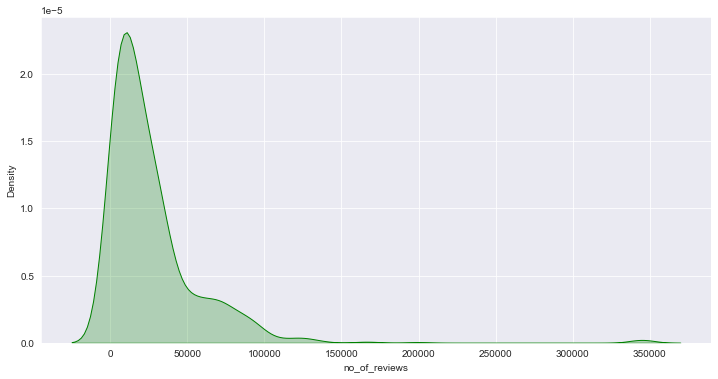

In [12]:
density_plot(dfy,'no_of_reviews')

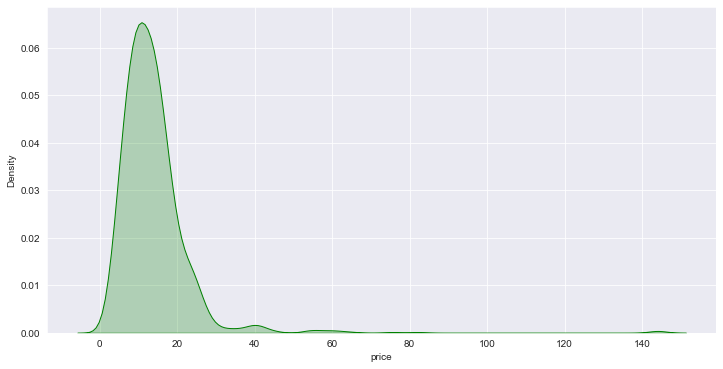

In [13]:
density_plot(dfy,'price')

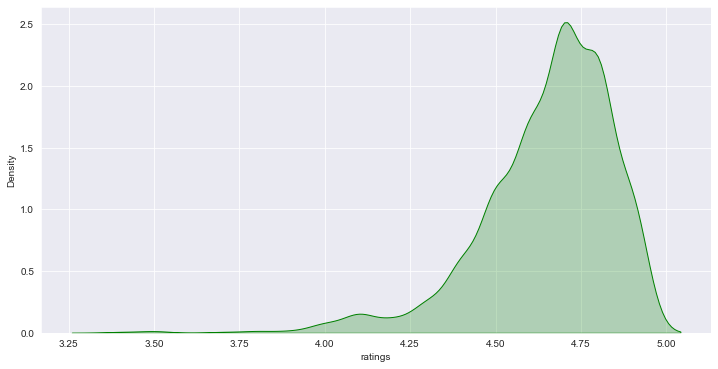

In [14]:
density_plot(dfy,'ratings')

In [15]:

dfy.no_of_reviews.describe()

count      1113.000000
mean      27144.422282
std       33784.741574
min          50.000000
25%        7513.000000
50%       17169.000000
75%       32887.000000
max      344811.000000
Name: no_of_reviews, dtype: float64

###### Replacing null values in the continous varible

In [16]:
dfy['no_of_reviews'] = dfy['no_of_reviews'].fillna(dfy['no_of_reviews'].median())
dfy['price'] = dfy['price'].fillna(dfy['price'].mean())
dfy['ratings'] = dfy['ratings'].fillna(dfy['ratings'].mode())

In [17]:
dfy.describe()

,price,ranks,no_of_reviews,ratings,year
count,1291.000000,1287.000000,1291.000000,1287.000000,1291.000000
mean,13.841254,50.246309,25769.034857,4.650894,2015.027111
std,9.961500,28.803308,31555.500301,0.197174,3.734404
min,1.500000,1.000000,50.000000,3.400000,2009.000000
25%,8.950000,25.000000,8846.500000,4.600000,2012.000000
50%,12.700000,50.000000,17169.000000,4.700000,2015.000000
75%,16.170000,75.000000,30603.500000,4.800000,2018.000000
max,144.000000,100.000000,344811.000000,4.900000,2021.000000


In [18]:
dfy.isna().sum().sum()

30

In [19]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1291 non-null   float64
 1   ranks          1287 non-null   float64
 2   title          1283 non-null   object 
 3   no_of_reviews  1291 non-null   float64
 4   ratings        1287 non-null   float64
 5   author         1283 non-null   object 
 6   cover_type     1285 non-null   object 
 7   year           1291 non-null   int64  
 8   category       1291 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 90.9+ KB


In [20]:
dfy.dropna(inplace=True)

In [21]:
dfy.no_of_reviews = dfy.no_of_reviews.astype(int)
dfy.price = dfy.price.astype(float)
dfy.ranks = dfy.ranks.astype(int)


In [ ]:
dfy.info()

In [ ]:
dfy

In [22]:
dfy.drop(dfy.loc[dfy['category']== 'unknown'].index, inplace=True)

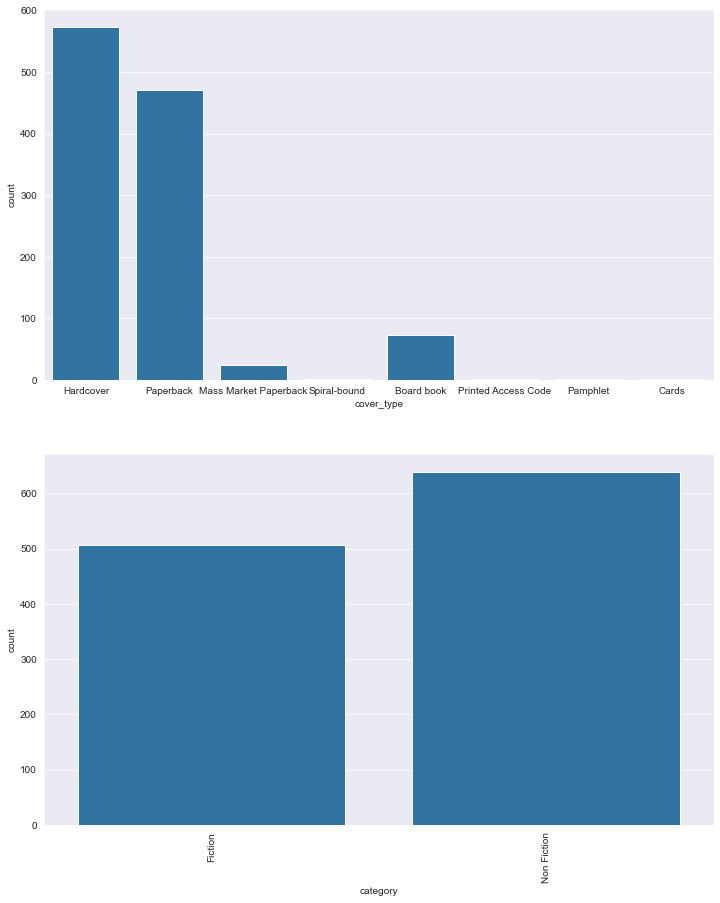

In [23]:
fig, ax = plt.subplots(nrows=2, figsize = [12,15])

default_color = sb.color_palette()[0]
sb.countplot(data = dfy, x = 'cover_type', color = default_color, ax = ax[0])
sb.countplot(data = dfy, x = 'category', color = default_color, ax = ax[1])

plt.xticks(rotation= 90)

plt.show()

In [24]:
def percentage_blocks(dfy, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * dfy[var].value_counts() / dfy.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts


def waffle_plot(dfy,var):
    """
    Take as input a dataframe as dfy and variable as var returns a waffle plot 
    of the distribution of the variable in the dataset
    """

    waffle_counts = percentage_blocks(dfy, var)

    prev_count = 0
    # for each category,
    for cat in range(waffle_counts.shape[0]):
        # get the block indices
        blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
        # and put a block at each index's location
        x = blocks % 10 # use mod operation to get ones digit
        y = blocks // 10 # use floor division to get tens digit
        plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
        prev_count += waffle_counts[cat]

        plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
        plt.axis('off')
        plt.axis('square')
        plt.title(f'waffle plot of {var} distribution'.title())

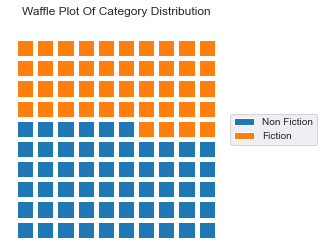

In [25]:
waffle_plot(dfy,'category')

In [26]:

percentage_blocks(dfy, 'category')

Non Fiction    56
Fiction        44
Name: category, dtype: int32

In [27]:
num_vars= [ 'price','no_of_reviews','ratings','ranks']       # numerical variables of interest
cat_vars = ['categoryr','cover_type']      # categorical variables of interest


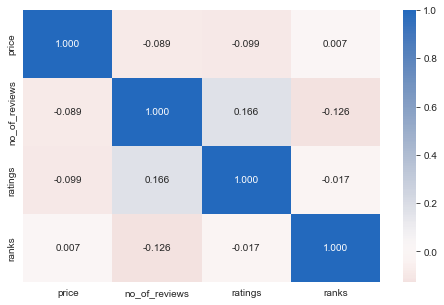

In [28]:
plt.figure(figsize = [8, 5])
sb.heatmap(dfy[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

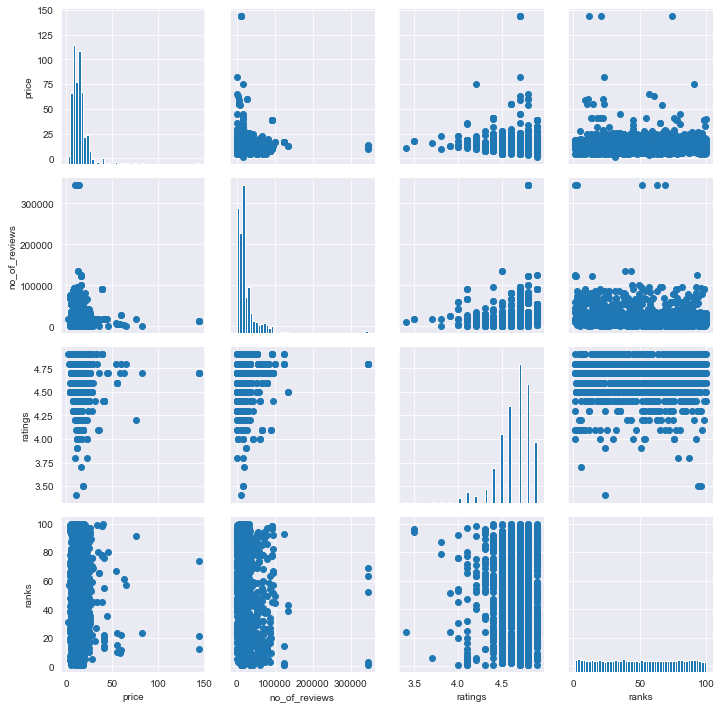

In [29]:
g = sb.PairGrid(data = dfy, vars = num_vars)
g = g.map_diag(plt.hist, bins = 50)
#plt.xscale('log')

g.map_offdiag(plt.scatter);

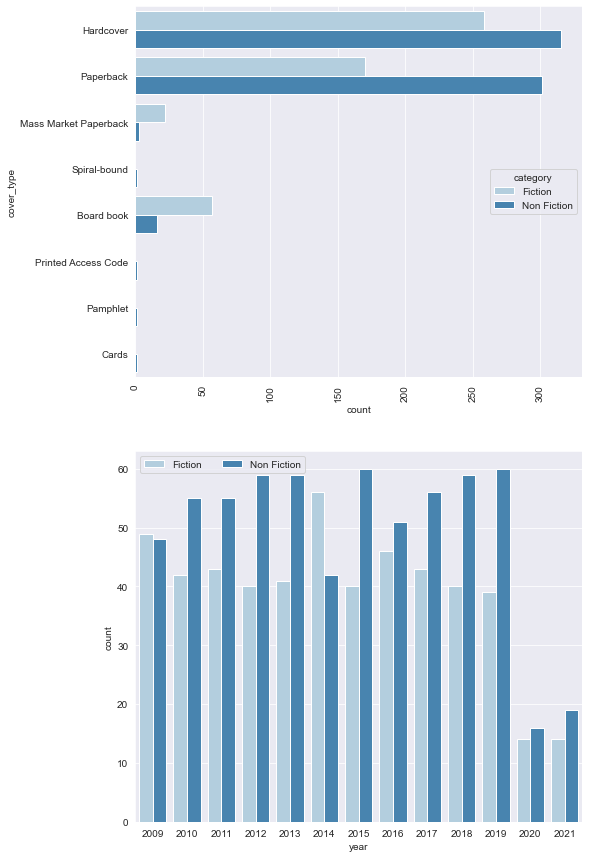

In [30]:
plt.figure(figsize = [8,15])

# subplot 1: weekday vs user_type
plt.subplot(2, 1, 1)
sb.countplot(data = dfy, y = 'cover_type', hue ='category' , palette = 'Blues')
plt.xticks(rotation= 90)

# subplot 2: member_gender vs. user_type
ax = plt.subplot(2, 1, 2)
sb.countplot(data = dfy, x = 'year', hue = 'category', palette = 'Blues')
ax.legend(ncol = 1) # re-arrange legend to reduce overlapping

ax.legend(loc =2 , ncol =5) 


In [ ]:
import plotly.express as px
temp=dfy.groupby('category')['title'].agg('count').reset_index()
temp.columns=['category','count']
px.pie(temp,labels='category',values='count',hover_data=['category'],title="Categories of the books")

In [34]:
def ghj (col1, col2):
    return dfy.groupby(col1)[[col2]].sum().sort_values(by = col2).reset_index()[-10:]
y = ghj('author','ratings') 
print(y)

                                 author  ratings
437                     Bill Martin Jr.     49.0
438  American Psychological Association     49.5
439                              Gallup     52.1
440                           Dr. Seuss     53.8
441                    Malcolm Gladwell     54.8
442                        John Grisham     56.6
443                        Gary Chapman     61.7
444                         Jeff Kinney     71.9
445                     Suzanne Collins     75.1
446                        Rick Riordan     86.0


In [53]:
def jkj(col1,col2):
    d= ghj(col1,col2)
    d.plot(x=col1, y=[ col2],
           kind="barh", width = 0.8, figsize = (13,10));
    plt.title(f'{col1}s with the highest total Rating from 2009 to 2019 years'.title(),
             fontsize=15)
    #hbars = ax.bar(d['col1'], d['col2'], align='center',width =0.5)
    plt.xlabel(f'total {col2} for the decade'.title(), fontsize=15)
    plt.ylabel(f'{col1}'.title(), fontsize=15);
    plt.xticks( fontsize=12);
    #plt.bar_label(hbars, labels=d[col2],
                     #rotation=0, padding=10, fontsize=12.5);
    

    plt.legend(loc='lower right'); 

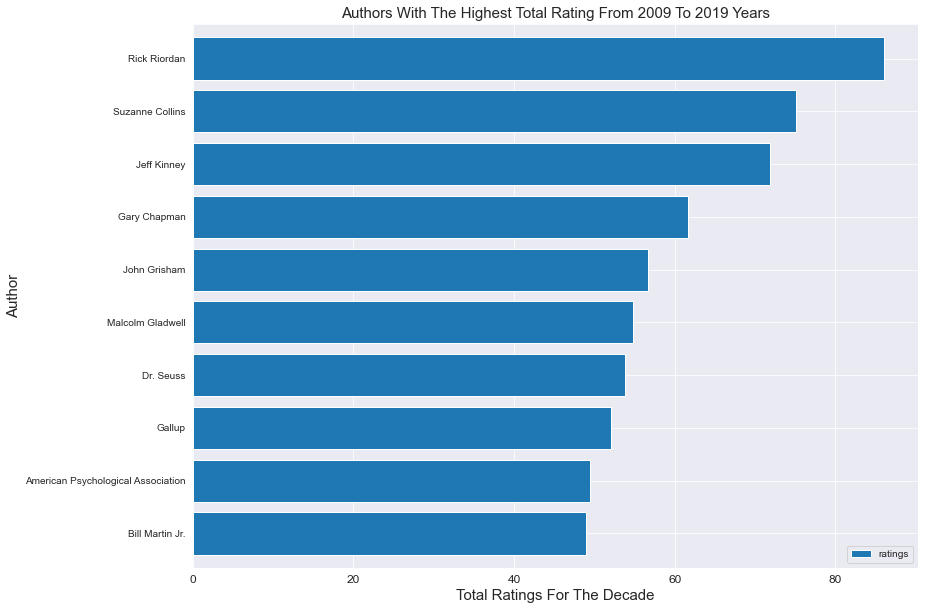

In [54]:
jkj('author','ratings')

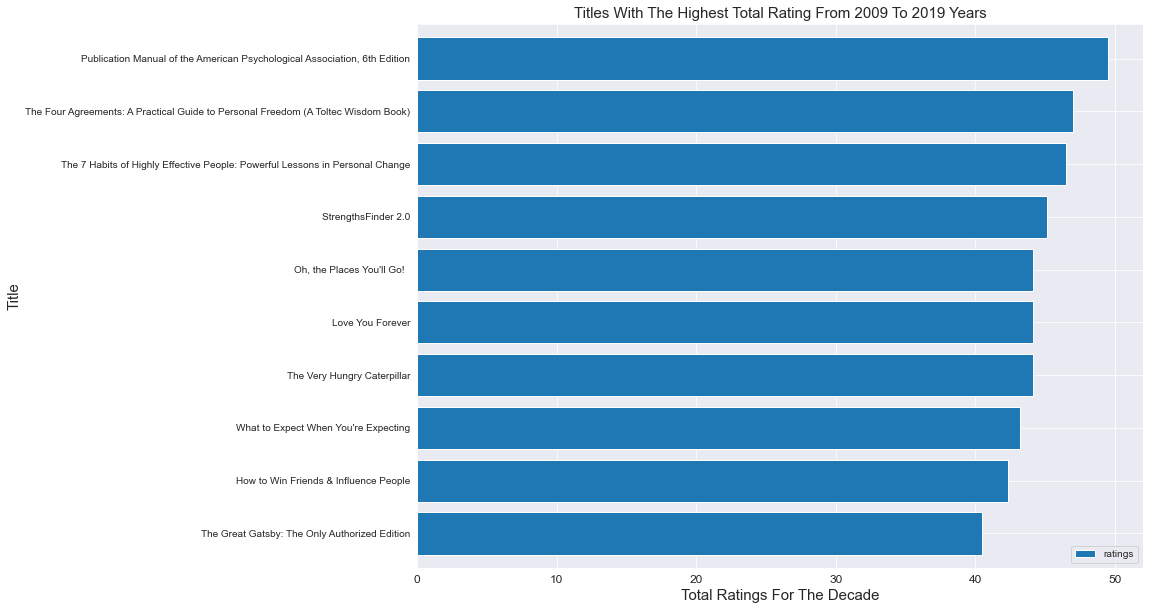

In [55]:
jkj('title','ratings')

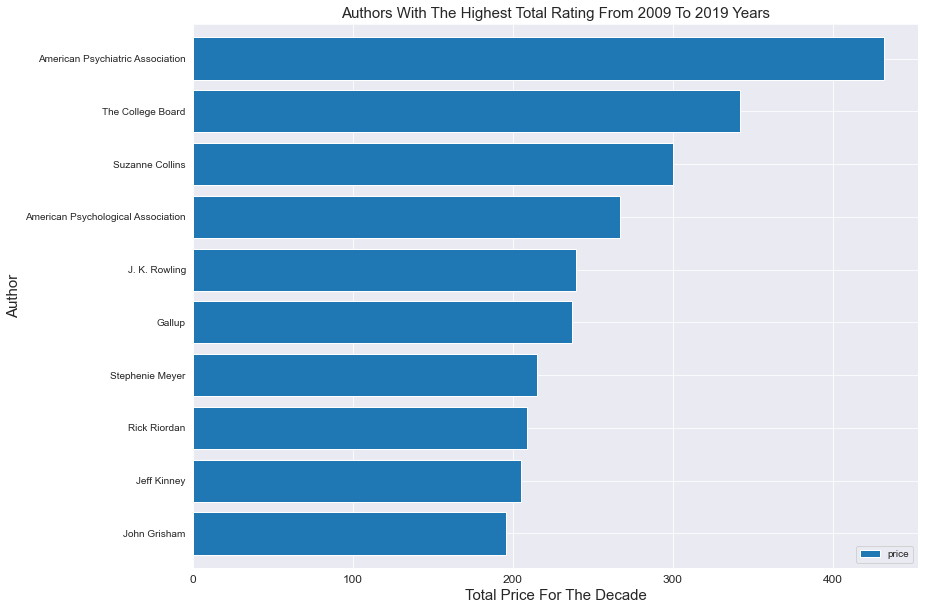

In [56]:
jkj('author','price')

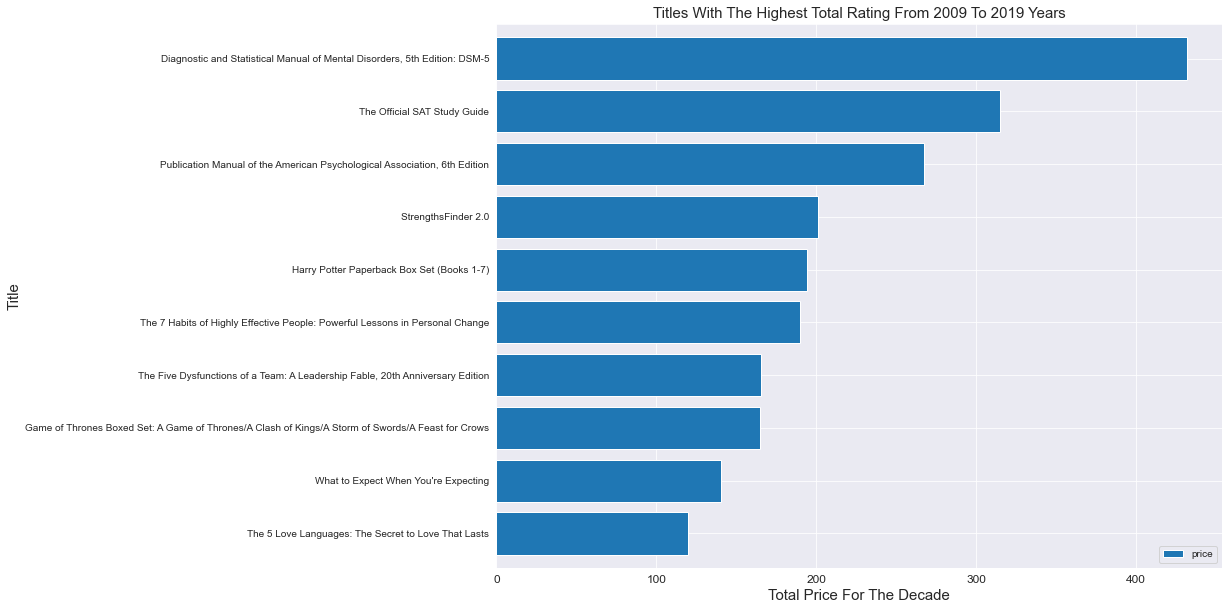

In [57]:
jkj('title', 'price')

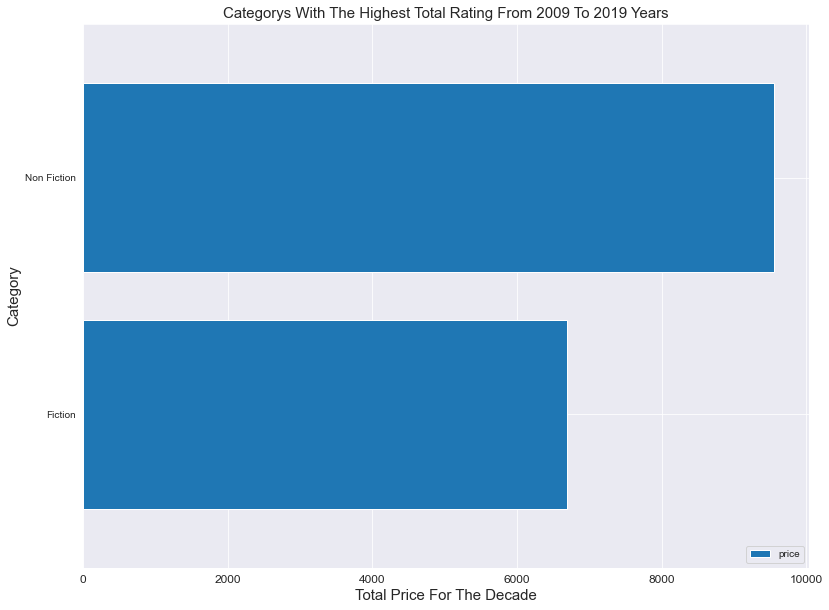

In [58]:
jkj('category','price')